In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
df_exp = pd.read_csv("2010_2021_HS2_export.csv")
df_imp = pd.read_csv("2010_2021_HS2_import.csv")
df_imp["flag"] = "import"
df_exp["flag"] = "export"
df_trade = pd.concat([df_imp,df_exp],ignore_index=True)
df_trade.to_csv("new trade dataset.csv",index = False)
df_trade

,HSCode,Commodity,value,country,year,flag
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010,import
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010,import
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010,import
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010,import
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010,import
...,...,...,...,...,...,...
285801,94,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",0.19,ZIMBABWE,2021,export
285802,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2021,export
285803,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.31,ZIMBABWE,2021,export
285804,98,PROJECT GOODS; SOME SPECIAL USES.,0.01,ZIMBABWE,2021,export


| Column Name | Description                              |
|-------------|------------------------------------------|
| year        | Year of the trade                        |
| country     | Partner country involved in trade       |
| HSCode      | Harmonized System Code — product classification |
| commodity   | Description of the product traded       |
| value       | Trade value in USD                       |
| flag        | Either 'Export' or 'Import'              |

**Example Tuple:**

| year | country | HSCode | commodity | value     | flag   |
|------|---------|--------|-----------|-----------|--------|
| 2020 | China   | 1006   | Rice      | 3,500,000 | Export |


In [14]:
df_trade.dropna(inplace=True)
df_trade.columns = df_trade.columns.str.strip().str.lower()
df_trade

,hscode,commodity,value,country,year,flag
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010,import
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010,import
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010,import
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010,import
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010,import
...,...,...,...,...,...,...
285801,94,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",0.19,ZIMBABWE,2021,export
285802,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2021,export
285803,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.31,ZIMBABWE,2021,export
285804,98,PROJECT GOODS; SOME SPECIAL USES.,0.01,ZIMBABWE,2021,export


Trade Value by Year

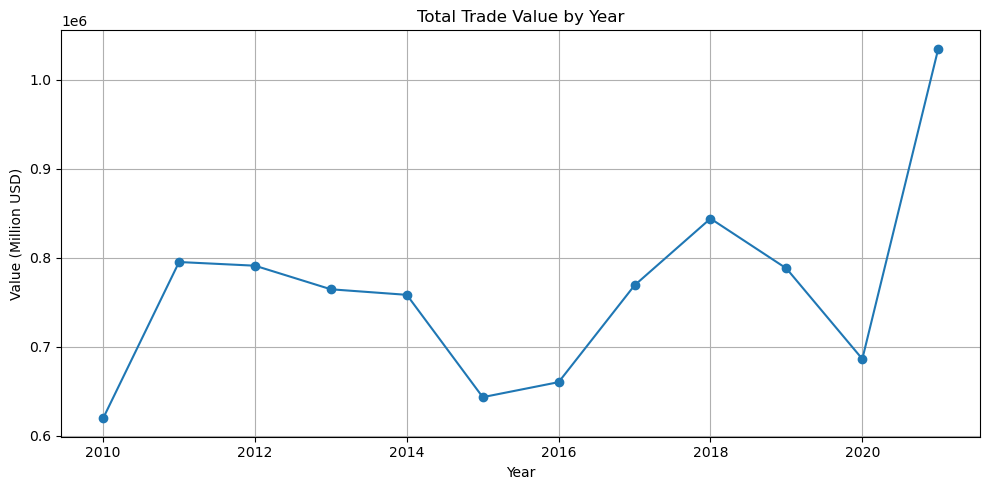

In [15]:
total_by_year = df_trade.groupby('year')['value'].sum()

plt.figure(figsize=(10, 5))
plt.plot(total_by_year.index, total_by_year.values, marker='o')
plt.title('Total Trade Value by Year')
plt.xlabel('Year')
plt.ylabel('Value (Million USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

Top 10 Trading Partners

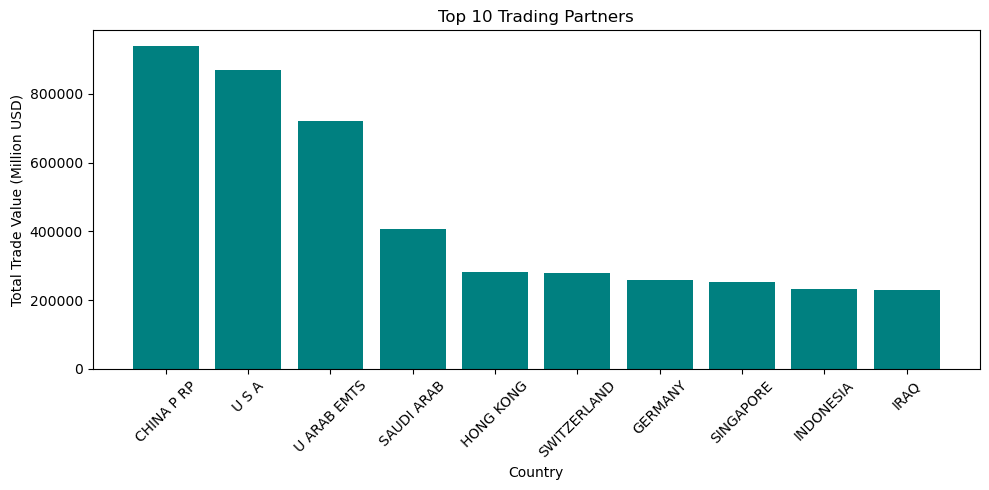

In [16]:
top_countries = df_trade.groupby('country')['value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_countries.index, top_countries.values, color='teal')
plt.title('Top 10 Trading Partners')
plt.xlabel('Country')
plt.ylabel('Total Trade Value (Million USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Commodities Traded

C:\Users\hp\AppData\Local\Temp\ipykernel_17536\979625170.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


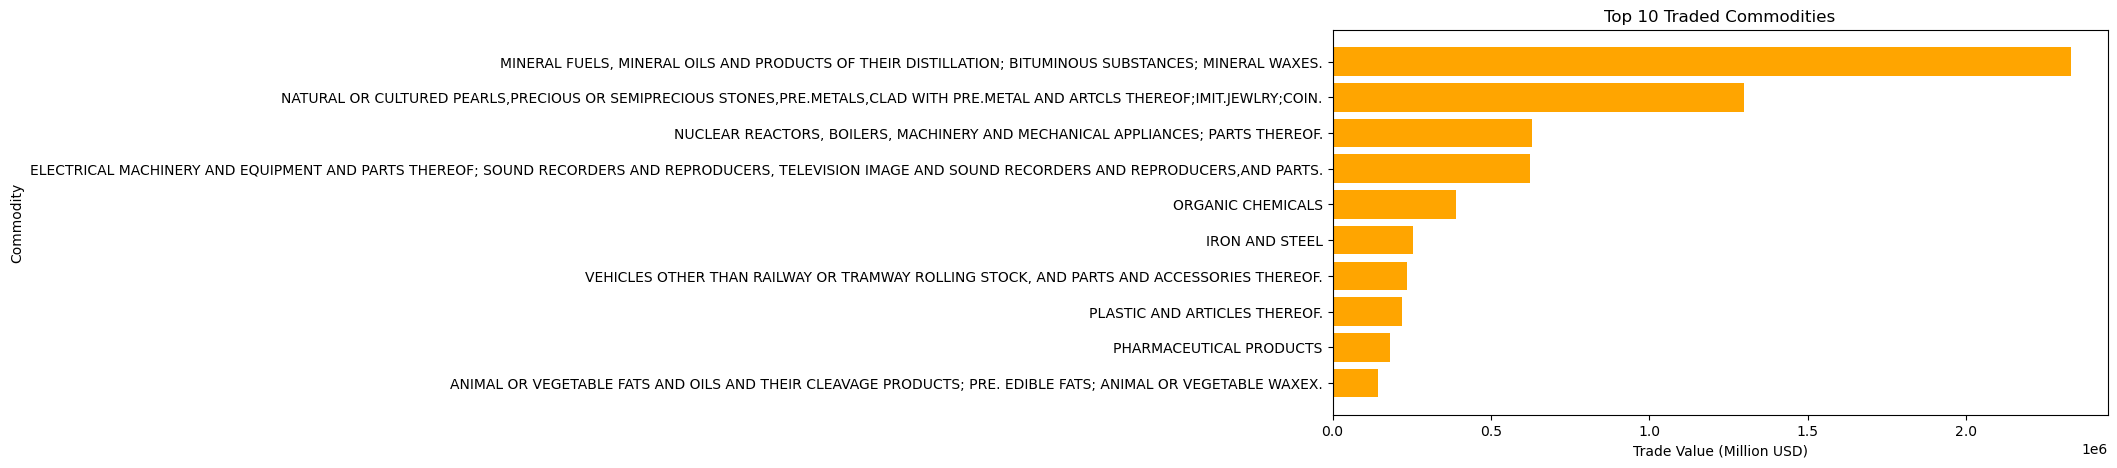

In [17]:
top_commodities = df_trade.groupby('commodity')['value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_commodities.index[::-1], top_commodities.values[::-1], color='orange')
plt.title('Top 10 Traded Commodities')
plt.xlabel('Trade Value (Million USD)')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()

mport vs Export Share Per Year

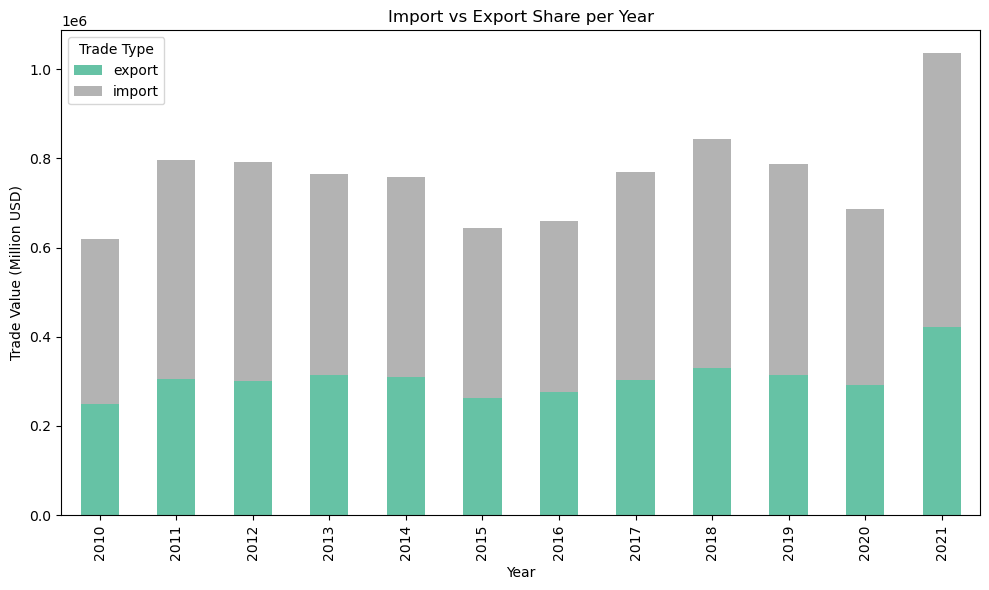

In [18]:
trade_by_flag = df_trade.groupby(['year', 'flag'])['value'].sum().unstack()

trade_by_flag.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Import vs Export Share per Year')
plt.xlabel('Year')
plt.ylabel('Trade Value (Million USD)')
plt.legend(title='Trade Type')
plt.tight_layout()
plt.show()